<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Run GriddedCCP

In [1]:
cd ..

/private/home/yannd/projects/Neural-Process-Family


In [2]:
import neuralproc

In [3]:
import submitit
from train_imgs import main, parse_arguments

log_folder="logs/%j"

In [4]:
def repeat_list(l, n):
    return [i for i in l for _ in range(n)]

class Run:
    def checkpoint(self, args):
        """Resubmits the same callable with the same arguments but makes sure continnue from last chckpnt."""
        args.is_continue_train=True 
        return submitit.utils.DelayedSubmission(self, args)
    
    def __call__(self, args):
        job_env = submitit.core.utils.JobEnvironment()
        args.starting_run = args.starting_run * job_env.num_tasks + job_env.local_rank
        return main(args)

In [61]:
[11 + 10*(1+2*i)//2 for i in range(1,9)]

[26, 36, 46, 56, 66, 76, 86, 96]

In [14]:
datasets_64 = ["zs-multi-mnist"]

Grided_ccp_kwargs = [(f"GridedCCP_varyingk/k{kernel}", f"--n-blocks 5 --kernel-size {kernel} --init-kernel-size 11 --max-epochs 100")
                     for kernel in [1+2*i for i in range(1,9)]]

args_64_ccp = [parse_arguments("GridedCCP {} --starting-run {} --name {} --chckpnt-dirname results/iclr-rebuttals/ {}".format(d, s, name, other).split())
                for s in range(3)
                for d in datasets_64
                for name,other in Grided_ccp_kwargs]


In [15]:
executor_64_ccp=submitit.SlurmExecutor(folder=log_folder, max_num_timeout=3)
executor_64_ccp.update_parameters(num_gpus=1, 
                                   time=60*24,  
                                   cpus_per_task=10, 
                                   mem='32GB',
                                   ntasks_per_node=2,
                                  )

In [16]:
job_64_ccp = executor_64_ccp.map_array(Run(), args_64_ccp)

In [17]:
############################################################

In [124]:
job_64_ccp

[SlurmJob<job_id=19952967_0, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_1, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_2, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_3, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_4, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_5, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_6, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_7, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_8, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_9, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_10, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_11, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_12, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_13, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_14, task_id=None, state="COMPLETED">,
 SlurmJob<job_id=19952967_15, task_id=None, state=

In [121]:
for j in job_64_ccp:
    print("--------------------------------")
    print(j.stdout())

--------------------------------
submitit INFO (2019-11-08 20:54:09,247) - Starting with JobEnvironment(job_id=19952967_0, hostname=learnfair0486, local_rank=0(2), node=0(1), global_rank=0(2))
submitit INFO (2019-11-08 20:54:09,247) - Loading pickle: /private/home/yannd/projects/Neural-Process-Family/logs/19952967_0/19952967_0_submitted.pkl

--- Training zs-multi-mnist/GridedCCP_varyingk/k3/run_0 ---

  epoch    train_loss    valid_loss    cp      dur
-------  ------------  ------------  ----  -------
      1       -1.1927       -1.2197     +  97.3455
      2       -1.2463       -1.2620     +  95.6888
      3       -1.2739       -1.2855     +  95.9279
      4       -1.2780       -1.2846        95.6933
      5       -1.2867       -1.2916     +  95.5064
      6       -1.2897       -1.3009     +  96.5749
      7       -1.2897       -1.2816        94.8401
      8       -1.2896       -1.3118     +  95.9372
      9       -1.2915       -1.2943        95.2956
     10       -1.2920       -1.282

In [31]:
for j in job_64_ccp:
    print("--------------------------------")
    print(j.stderr())

--------------------------------
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...

INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...

--------------------------------
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...

INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...

--------------------------------
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...

INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...

--------------------------------
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...

INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...
INFO:utils.data.imgs:Resizing ZeroShotMultiMNIST ...

------------

In [53]:
for j in job_64_ccp:
    j.cancel()

In [125]:
import seaborn as sns
import pandas as pd
from glob import glob
import numpy as np

dfs = []
prfx = "results/iclr-rebuttals/zs-multi-mnist/GridedCCP_varyingk/k"
for g in glob(f"{prfx}*/run*/eval.csv"):
    test_loglike = np.loadtxt(g, delimiter=",").mean()
    sffx = g[len(prfx):]
    splitted = sffx.split("/")
    kernel = int(splitted[0])
    receptive_field = 11 + (kernel//2 * 5 *2)
    run = int(splitted[1][len("run_"):])
    dfs.append([receptive_field,run,test_loglike])
    
    
df = pd.DataFrame(dfs,columns=["Size of Receptive Field","run","Test Log Likelihood"])

In [126]:
%autosave 600
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# CENTER PLOTS
from IPython.core.display import HTML
display(HTML(""" <style> .output_png {display: table-cell; text-align: center; margin:auto; }
.prompt display:none;}  </style>"""))
  
import sys
sys.path.append("notebooks")

import numpy as np
import matplotlib.pyplot as plt
import torch


Autosaving every 600 seconds


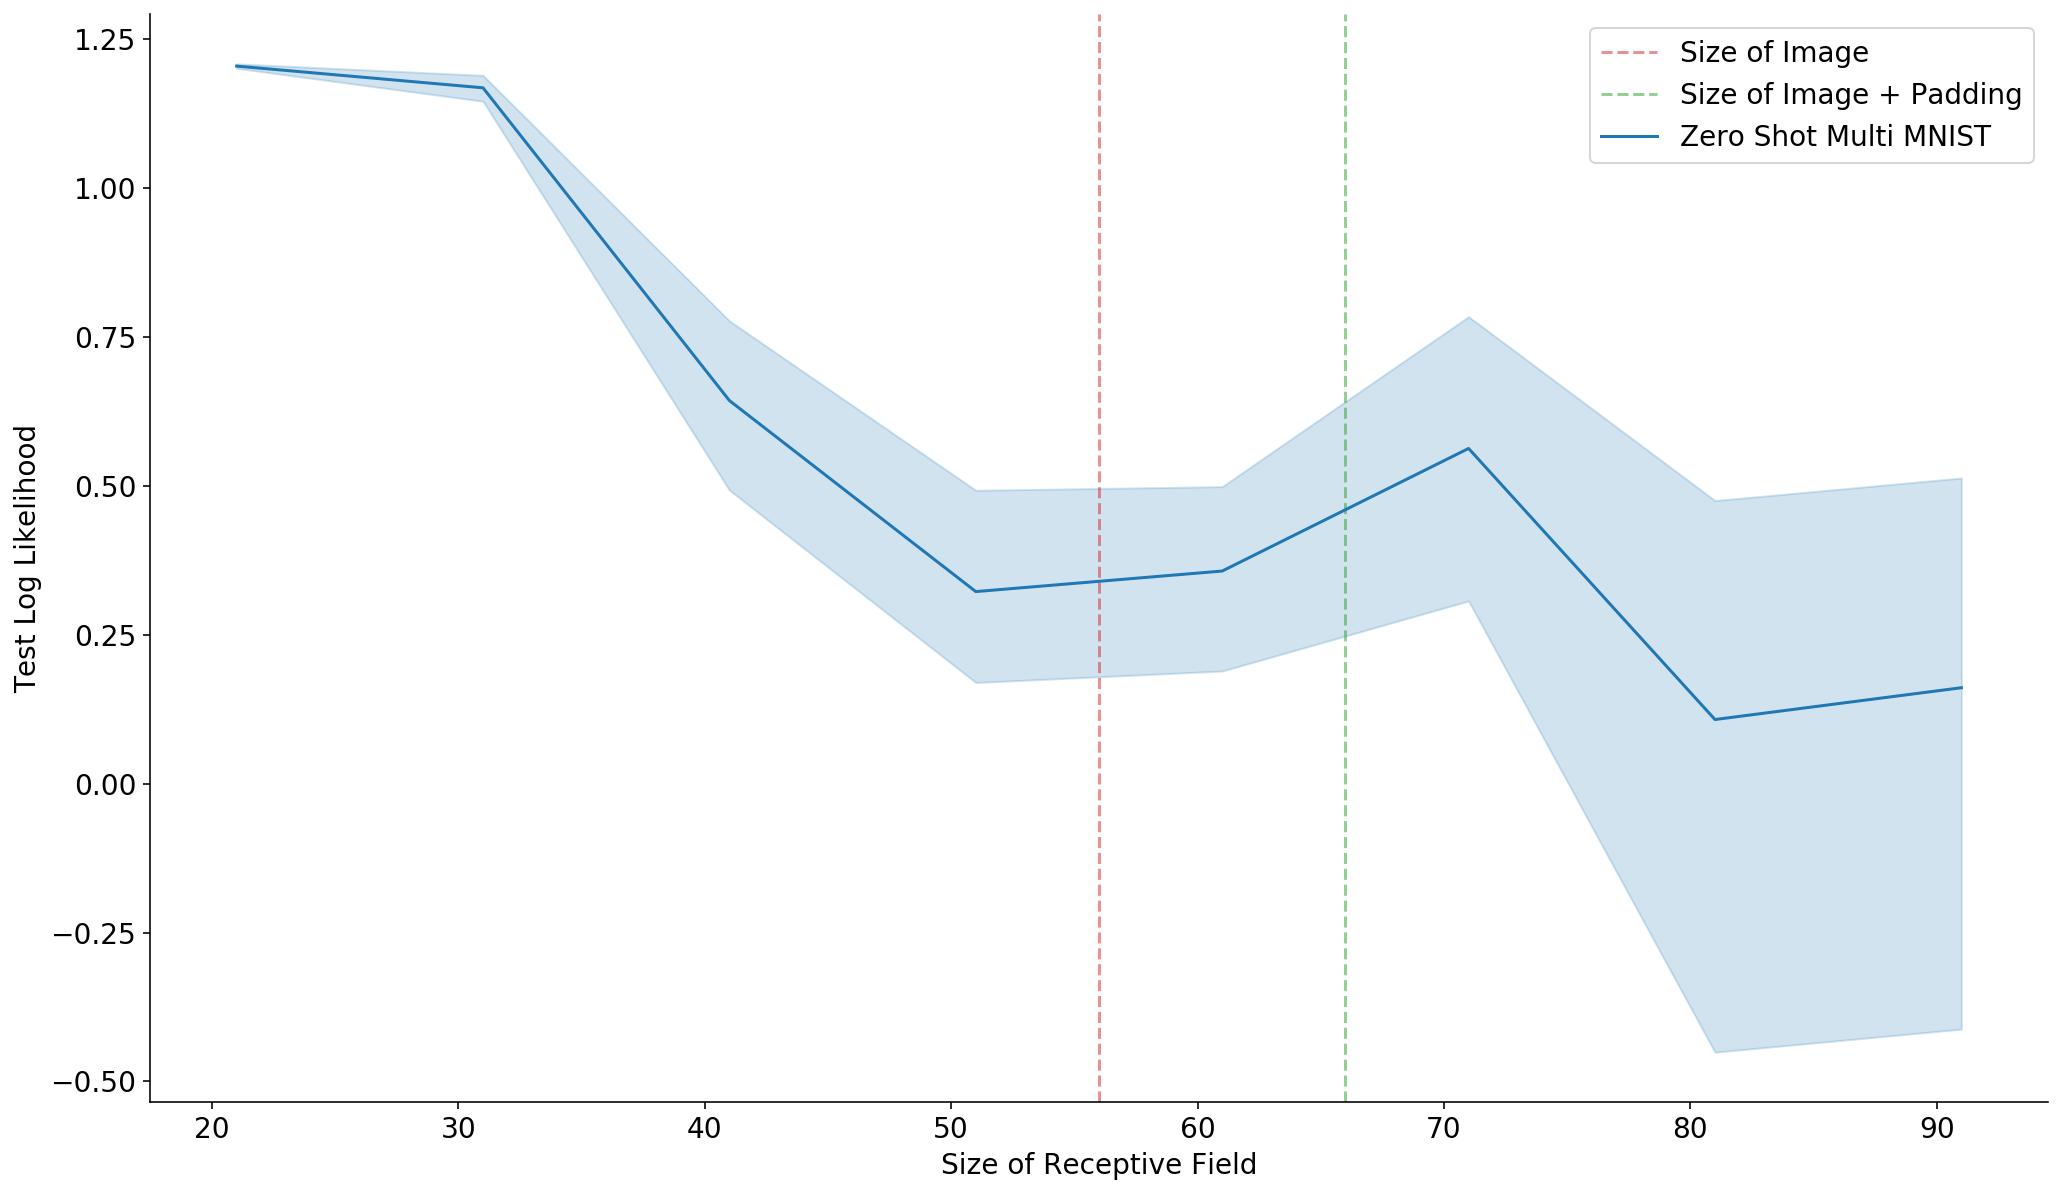

In [128]:
plt.rcParams.update({"font.size": 14})
fig, ax = plt.subplots(1,1,figsize=(17,10))
ax.axvline(56, ls='--', color="tab:red", alpha=0.5, label="Size of Image")
ax.axvline(66, ls='--', color="tab:green", alpha=0.5, label="Size of Image + Padding")
sns.lineplot(x="Size of Receptive Field", y="Test Log Likelihood", data=df, ax=ax, label="Zero Shot Multi MNIST")
sns.despine()